<a href="https://colab.research.google.com/github/PankajBGadge/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### <b>Problem Statement</b>
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.

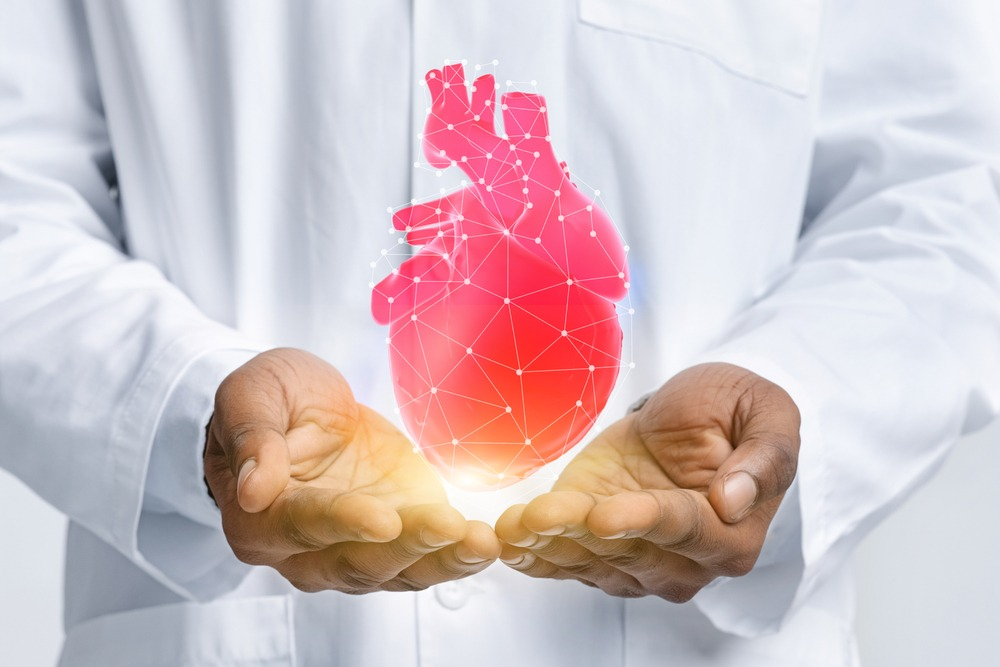

## **Variables**
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.
## **Data Description**
**Demographic:**


• **Sex:** male or female("M" or "F")

• **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


 **Behavioral**

• **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)


**Medical( history)**
• **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)

• **Diabetes:** whether or not the patient had diabetes (Nominal)
Medical(current)

• **Tot Chol:** total cholesterol level (Continuous)

• **Sys BP:** systolic blood pressure (Continuous)

• **Dia BP:** diastolic blood pressure (Continuous)

• **BMI:** Body Mass Index (Continuous)

• **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values).

• **Glucose:** glucose level (Continuous)

# **Predict variable (desired target)**

• **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **Now lets import required libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Cardiovascular Risk Prediction-Pankaj Gadge/data_cardiovascular_risk.csv')

# **Data Inspection**

In [6]:
# First look
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
dataset.shape

(3390, 17)

There are 17 columns and 3390 rows in our dataset





# **Data Cleaning**

Before providing data to a model, it is essential to clean the data and treat the nulls, outliers, duplicate data records.

# **Convert NaN values**

In [9]:
dataset.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:

dataset['cigsPerDay'].fillna(0, inplace=True)
dataset['BPMeds'].fillna(0, inplace=True)
dataset['totChol'].fillna(0, inplace=True)
dataset['BMI'].fillna(0, inplace=True)
dataset['heartRate'].fillna(0, inplace=True)
dataset['glucose'].fillna(0, inplace=True)

In [11]:
dataset.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

**As number of count of NaN values are not more than 20% so we replace these values with zero instead of mean, median or mode.**

In [12]:
dataset = dataset.drop(['id','education'],axis=1)

Also we drop id and education column as we think this is  not important feature for analysis.

In [13]:
dataset.shape

(3390, 15)

In [14]:
dataset.describe(include='all')

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,NaN,NaN,9.010619,0.029499,0.006490,0.315339,0.025664,234.416814,132.60118,82.883038,25.688437,75.954867,74.725369,0.150737
std,8.592878,NaN,NaN,11.862839,0.169224,0.080309,0.464719,0.158153,51.453991,22.29203,12.023581,4.427674,12.041020,32.944006,0.357846
min,32.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.50000,48.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.00000,74.500000,22.972500,68.000000,68.000000,0.000000
50%,49.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.365000,75.000000,77.000000,0.000000
75%,56.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


In [15]:
# duplicate
len(dataset[dataset.duplicated()])

0

**There are no duplicate in our datasets**

In [16]:
dataset.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# **Data encoding**

Before we start predicting, an important step to do is to convert our sex and is_smoking feature, which is a string, into integer. M will be converted to 1 and F will be converted to 0. Same for YES will be converted to 1 and NO will be converted to 0.We will name this new columns a "Sex" and "Smoking".

In [17]:
dataset['sex'] = dataset['sex'].apply(lambda x : 1 if x == "M" else 0)



In [18]:
dataset['is_smoking'] = dataset['is_smoking'].apply(lambda x : 1 if x == "YES" else 0)

In [19]:
dataset.head(10)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,61,1,0,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,36,1,1,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,41,0,1,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,55,0,0,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,0.0,0


# **Exploring Dependent Variable**

In [20]:
dataset['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

From the graph and statistical analysis it is clear that most of the people in the dataset have not 10-year risk of coronary heart disease CHD(2879 peoples) and 511 peoples have 10-year risk of coronary heart disease CHD.

# **Exploratory Data Analysis**

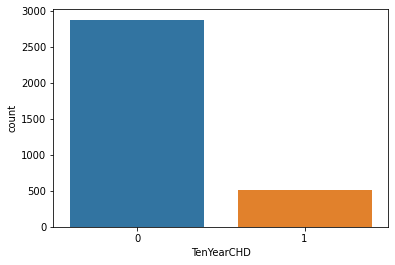

In [21]:
sns.countplot(x=dataset['TenYearCHD'])

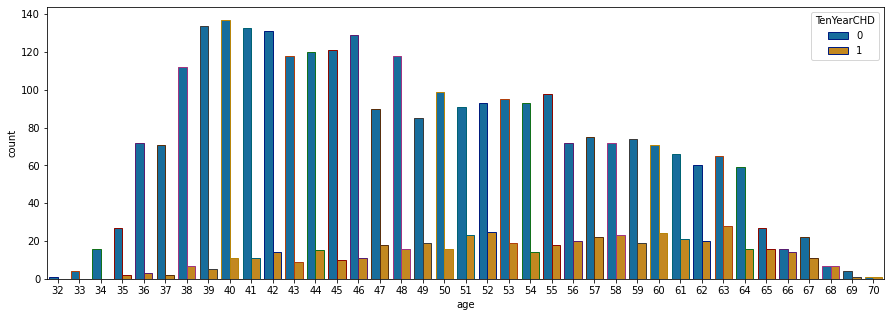

In [22]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(x='age',hue='TenYearCHD',data=dataset,palette='colorblind',edgecolor=sns.color_palette('dark'))

From the count plat we can see at the age of 63, there are high risk for 10-year risk of coronary heart disease CHD and at the age from 32 to 34 very less risk for 10-year risk of coronary heart disease CHD.

Percentage of Senior people lose their life : 29.22077922077922


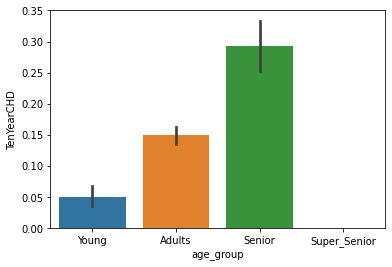

In [23]:
bins = [20,40,60, 80, np.nan]
labels = ['Young','Adults', 'Senior', 'Super_Senior']

dataset['age_group'] = pd.cut(dataset['age'], bins=bins, labels=labels)

print('Percentage of Senior people lose their life :', dataset['TenYearCHD'][dataset['age_group']=='Senior'].value_counts(normalize=True)[1]*100)

sns.barplot(x='age_group', y='TenYearCHD', data=dataset)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


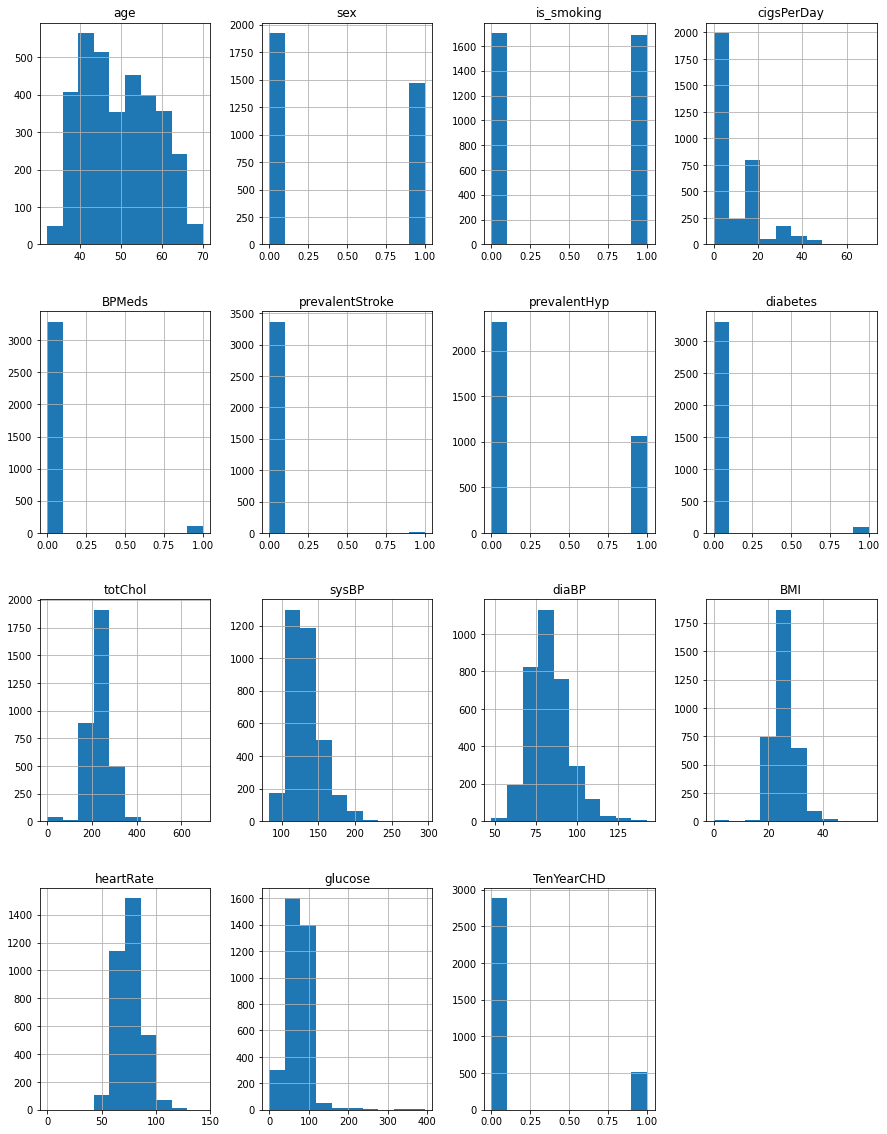

In [24]:
# understanding distribution of data before imputation
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)
plt.show()

A histogram is a graph showing frequency distributions.
It is a graph showing the number of observations within each given interval.With Histograms we can see the shape of each feature and provides the count of number of observations in each bin.

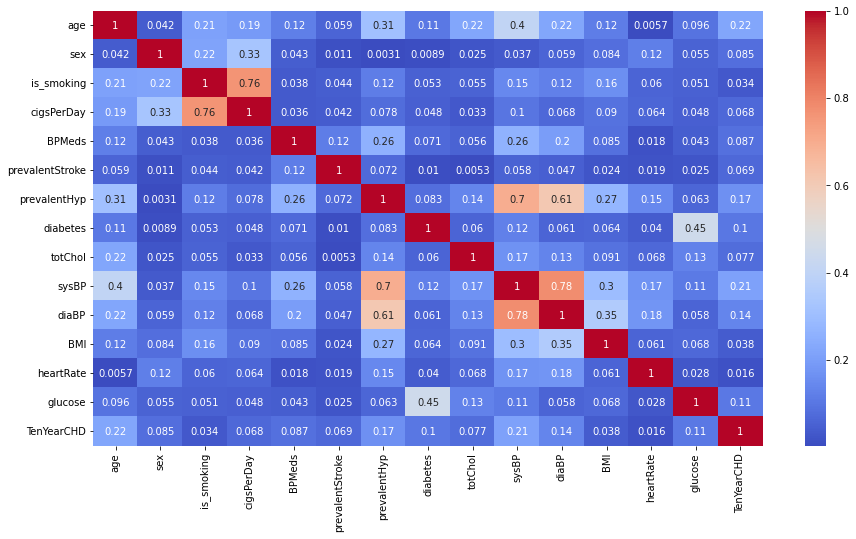

In [25]:
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We can see there is a positive correlation between age,glucose,diaBP,SysBP,Diabetes,pravalentHyp with TenYearCHD . This makes sense since, all these features increases a greater chance of having heart disease. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


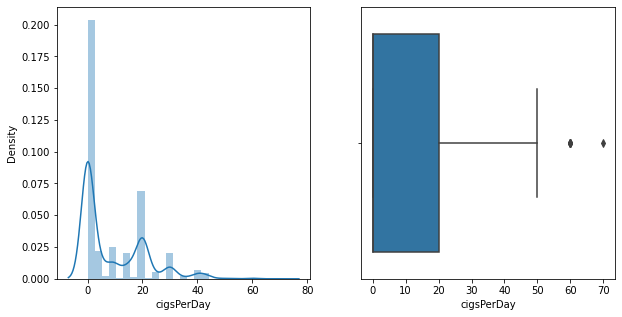

In [26]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['cigsPerDay'], ax=axes[0])
sns.boxplot(dataset['cigsPerDay'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


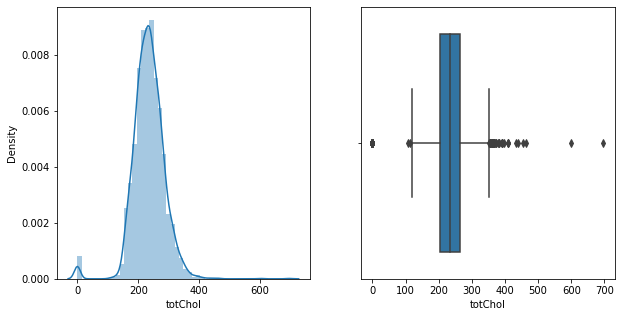

In [27]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['totChol'], ax=axes[0])
sns.boxplot(dataset['totChol'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


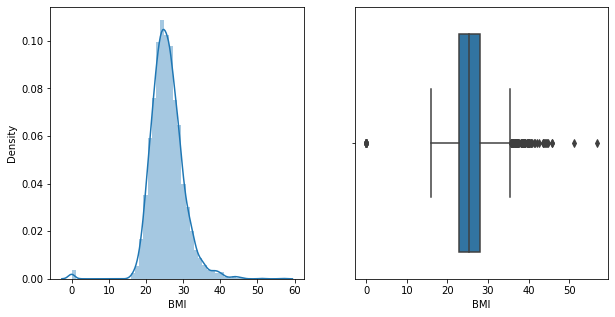

In [28]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['BMI'], ax=axes[0])
sns.boxplot(dataset['BMI'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


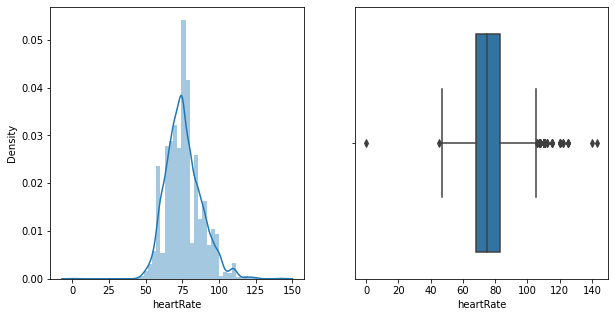

In [29]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['heartRate'], ax=axes[0])
sns.boxplot(dataset['heartRate'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


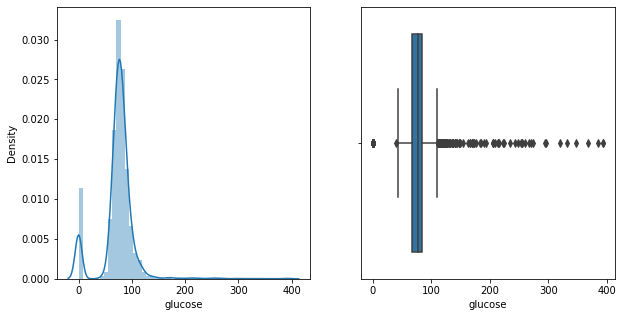

In [30]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['glucose'], ax=axes[0])
sns.boxplot(dataset['glucose'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


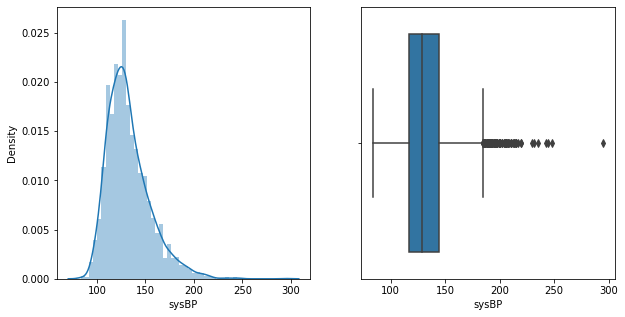

In [31]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['sysBP'], ax=axes[0])
sns.boxplot(dataset['sysBP'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


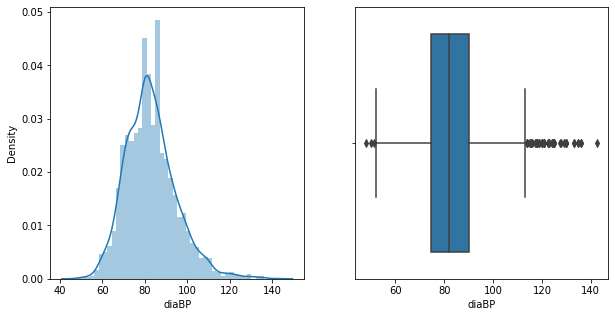

In [32]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['diaBP'], ax=axes[0])
sns.boxplot(dataset['diaBP'], ax=axes[1])

From the box plots, outliers are present in cigsPerDay,totchol,BMI,Heart rate,glucose,sysBP,diaBP.

The Outliers are removed using two methods,


1. Inter-Quartile Range
In IQR, the data points higher than the upper limit and lower than the lower limit are considered outliers.

upper limit = Q3 + 1.5 * IQR

lower limit = Q1 – 1.5 * IQR


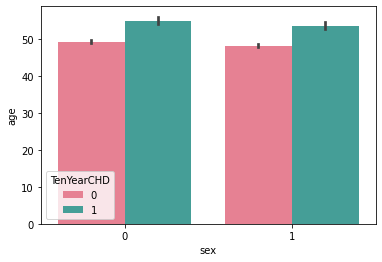

In [33]:
sns.barplot(data=dataset,x='sex',y='age',hue='TenYearCHD',palette='husl')

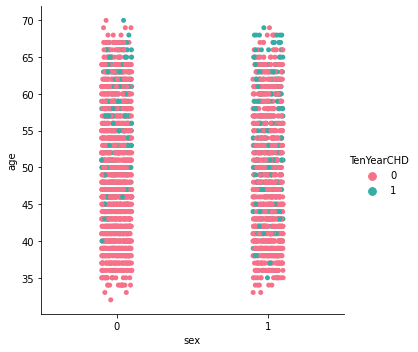

In [34]:
sns.catplot(data=dataset,x='sex',y='age',hue='TenYearCHD',palette='husl')

In [35]:
dataset.groupby(['TenYearCHD'])['age','sysBP','diaBP','heartRate','BMI','glucose','diabetes','is_smoking','prevalentHyp'].count().sort_values(by='TenYearCHD',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,age,sysBP,diaBP,heartRate,BMI,glucose,diabetes,is_smoking,prevalentHyp
TenYearCHD,,,,,,,,,
1,511,511,511,511,511,511,511,511,511
0,2879,2879,2879,2879,2879,2879,2879,2879,2879


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


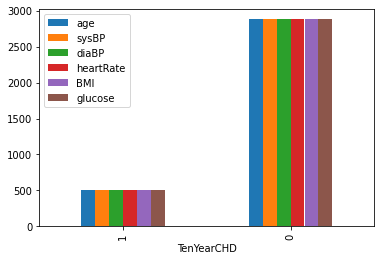

In [36]:
dataset.groupby(['TenYearCHD'])['age','sysBP','diaBP','heartRate','BMI','glucose'].count().sort_values(by='TenYearCHD',ascending=False).head(10).plot(kind='bar')

In [37]:
dataset = dataset.drop(['age_group'],axis=1)

# **Lets split the data into train and test data**

In [38]:
from scipy.stats import zscore
from scipy import stats


In [39]:
#Removing outliers using Z-score
z = np.abs(stats.zscore(dataset))
dataset2 = dataset[(z<3).all(axis=1)]
dataset2.shape

(3047, 15)

In [40]:
dataset2.tail(10)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3379,39,1,1,30.0,0.0,0,0,0,292.0,120.0,85.0,31.09,85.0,0.0,0
3380,56,0,1,20.0,0.0,0,0,0,240.0,125.0,79.0,27.38,80.0,82.0,0
3381,63,0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
3382,43,1,0,0.0,0.0,0,1,0,260.0,129.0,90.0,25.29,70.0,62.0,0
3383,57,0,0,0.0,0.0,0,0,0,210.0,131.0,85.0,26.59,70.0,77.0,0
3384,61,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,60,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3388,60,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,0,0,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [42]:
dataset2.head(30)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
7,36,1,1,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,41,0,1,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,55,0,0,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,0.0,0
11,53,0,0,0.0,0.0,0,0,0,210.0,138.0,86.5,22.49,88.0,87.0,0
12,43,0,0,0.0,0.0,0,0,0,213.0,96.0,62.0,19.38,74.0,80.0,0
13,44,1,1,40.0,0.0,0,0,0,227.0,146.5,97.0,26.92,80.0,67.0,0


In [43]:
# Data for all the independent variables
X = dataset2.drop('TenYearCHD',axis=1)

# Data for the dependent variable
Y = dataset2['TenYearCHD']

In [44]:
X.shape, Y.shape

((3047, 14), (3047,))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We do scaling to bring all the values to the same magnitude. Scaling or Standardization is brings the mean to zero and standard deviation to ‘one’. It assumes a Gaussian distribution. We perform Scaling to avoid biased predictions

In [47]:
# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(2285, 14) (2285,)
(762, 14) (762,)


In [48]:
from collections import Counter  

In [49]:
print('Train', Counter(y_train))

Train Counter({0: 1991, 1: 294})


In [50]:
print('Train', Counter(y_test))

Train Counter({0: 655, 1: 107})


# **Filtering data by positive & negative Heart Disease patient**

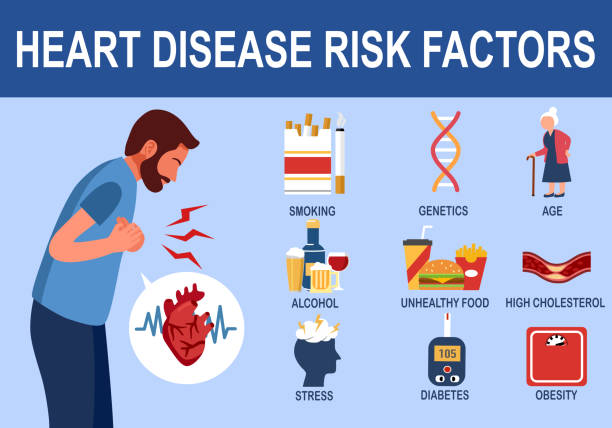

In [51]:
# Filtering data by POSITIVE Heart Disease patient
pos_data = dataset2[dataset2['TenYearCHD']==1]
pos_data.describe()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,401.000000,401.000000,401.000000,401.000000,401.0,401.0,401.000000,401.0,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.0
mean,53.476309,0.561097,0.566085,11.610973,0.0,0.0,0.416459,0.0,244.543641,137.967581,84.422693,25.995461,75.581047,75.418953,1.0
std,8.192989,0.496873,0.496233,12.982037,0.0,0.0,0.493587,0.0,44.401956,20.875259,11.733350,3.959945,11.300621,24.868032,0.0
min,35.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,124.000000,83.500000,48.000000,15.960000,50.000000,0.000000,1.0
25%,47.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,215.000000,123.000000,76.000000,23.100000,68.000000,70.000000,1.0
50%,54.000000,1.000000,1.000000,7.000000,0.0,0.0,0.000000,0.0,241.000000,135.000000,83.000000,25.860000,75.000000,77.000000,1.0
75%,60.000000,1.000000,1.000000,20.000000,0.0,0.0,1.000000,0.0,272.000000,152.000000,92.000000,28.670000,82.000000,87.000000,1.0
max,69.000000,1.000000,1.000000,43.000000,0.0,0.0,1.000000,0.0,380.000000,198.000000,116.000000,38.390000,110.000000,163.000000,1.0


It summarizes the count, mean, standard deviation, min, and max for patient having 10-year risk of coronary heart disease CHD

In [52]:
# Filtering data by NEGATIVE Heart Disease patient
pos_data = dataset2[dataset2['TenYearCHD']==0]
pos_data.describe()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2646.000000,2646.000000,2646.000000,2646.000000,2646.0,2646.0,2646.000000,2646.0,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.0
mean,48.360922,0.423658,0.495843,8.624339,0.0,0.0,0.250945,0.0,233.869615,128.744898,81.359033,25.419403,75.504913,72.366213,0.0
std,8.301600,0.494231,0.500077,11.228888,0.0,0.0,0.433639,0.0,41.979201,18.620428,10.596035,3.648613,11.403138,25.359526,0.0
min,32.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,113.000000,83.500000,50.000000,16.480000,45.000000,0.000000,0.0
25%,41.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,204.000000,115.000000,73.500000,22.880000,68.000000,68.000000,0.0
50%,47.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,232.000000,126.000000,81.000000,25.090000,75.000000,76.000000,0.0
75%,55.000000,1.000000,1.000000,20.000000,0.0,0.0,1.000000,0.0,261.000000,139.000000,87.500000,27.627500,82.000000,85.000000,0.0
max,69.000000,1.000000,1.000000,43.000000,0.0,0.0,1.000000,0.0,382.000000,199.000000,118.000000,38.960000,112.000000,142.000000,0.0


From comparing positive and negative patients we can see there are vast differences in means for many of our 14 Features. 

# **Now Lets implement 5 models on our dataset:**

Logistic Regression

Random Forrest

XGBoost

K-NN

Neural Networks


# **We will be using three search algorithms for each :**
One can increase the model performance using hyperparameters. Thus, finding the optimal hyperparameters would help us achieve the best-performing model.In this article, we  uses the Grid Search,RandomSearchCV and BayesianSearchCV technique for finding the optimal hyperparameters to increase the model performance.Our goal should be to find the best hyperparameters values to get the perfect prediction results from our mode

**GridSearchCV**

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

**RandomSearchCV**

Random search is a method in which random combinations of hyperparameters are selected and used to train a model. The best random hyperparameter combinations are used. Random search bears some similarity to grid search.

**BayesianSearchCV**

Bayesian Optimization also runs models many times with different sets of hyperparameter values, but it evaluates the past model information to select hyperparameter values to build the newer model. This is said to spend less time to reach the highest accuracy model than the previously discussed methods.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [54]:
pip install scikit_optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 6.1 MB/s 


In [55]:
import numpy as np
from skopt import gp_minimize

In [56]:

import skopt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn import ensemble


In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [58]:
lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)
knn = KNeighborsClassifier(n_neighbors=7)

# **Logistic Regression**

In [59]:
param_dict_lr = {
    'C' : [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6,1e+7]
}

param_dict_rf = {
    'max_depth': [4, 6, 8,10],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

param_dict_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }


    
  

In [60]:
lr_grid = GridSearchCV(estimator=lr,
                       param_grid = param_dict_lr,
                       cv = 8, verbose=2, scoring='roc_auc')
lr_grid.fit(X_train,y_train)


Fitting 8 folds for each of 15 candidates, totalling 120 fits
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END ............................................C=1e-06; total time=   0.0s
[CV] END ......................................

GridSearchCV(cv=8, estimator=LogisticRegression(),
             param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                               10, 100, 0.001, 10000.0, 100000.0, 1000000.0,
                               10000000.0]},
             scoring='roc_auc', verbose=2)

In [61]:
print('Train ROC-AUC score : ', lr_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', lr_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8722100656455142
Test ROC-AUC score :  0.8595800524934383


In [62]:
lr_random = RandomizedSearchCV(estimator=lr,
                       param_distributions = param_dict_lr,
                       cv = 5, verbose=2, scoring='roc_auc')

lr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........................................C=1000000.0; total time=   0.0s
[CV] END ........................................C=1000000.0; total time=   0.0s
[CV] END ........................................C=1000000.0; total time=   0.0s
[CV] END ........................................C=1000000.0; total time=   0.0s
[CV] END ........................................C=1000000.0; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ..........................................C=10000.0; total time=   0.0s
[CV] END .......................................

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-07, 1e-06, 1e-05, 0.0001,
                                              0.001, 0.01, 0.1, 1, 10, 100,
                                              0.001, 10000.0, 100000.0,
                                              1000000.0, 10000000.0]},
                   scoring='roc_auc', verbose=2)

In [63]:
print('Train ROC-AUC score : ', lr_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', lr_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8722100656455142
Test ROC-AUC score :  0.8595800524934383


In [64]:
lr_bayes = BayesSearchCV(estimator=lr,
                       search_spaces = {'C' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='roc_auc', n_iter=32)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................................C=80.62683065063528; total time=   0.0s
[CV] END ................................C=80.62683065063528; total time=   0.0s
[CV] END ................................C=80.62683065063528; total time=   0.0s
[CV] END ................................C=80.62683065063528; total time=   0.0s
[CV] END ................................C=80.62683065063528; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................................C=109.0696479301489; total time=   0.0s
[CV] END ................................C=109.0696479301489; total time=   0.0s
[CV] END ................................C=109.0696479301489; total time=   0.0s
[CV] END ................................C=109.0696479301489; total time=   0.0s
[CV] END ................................C=109.0696479301489; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=LogisticRegression(), n_iter=32,
              scoring='roc_auc',
              search_spaces={'C': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [65]:
lr_bayes.best_estimator_

LogisticRegression(C=0.020056861801743677)

In [66]:
print('Train ROC-AUC score : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8730853391684902
Test ROC-AUC score :  0.8595800524934383


**Out of three search algorithms we conclude that all the three search algorithm doing well.But when we compare GridSearchCV slightly better as compared to RandomSearchCV and BayesianSearchCV**

In [67]:
lr_model =lr_grid.best_estimator_

In [68]:
# Get the predicted probabilities
train_preds_lr = lr_grid.predict_proba(X_train)
test_preds_lr= lr_grid.predict_proba(X_test)

In [69]:
train_preds_lr

array([[0.94122879, 0.05877121],
       [0.73935734, 0.26064266],
       [0.88890879, 0.11109121],
       ...,
       [0.90019089, 0.09980911],
       [0.81962211, 0.18037789],
       [0.82688033, 0.17311967]])

In [70]:
test_preds_lr

array([[0.85999156, 0.14000844],
       [0.95263348, 0.04736652],
       [0.92014613, 0.07985387],
       ...,
       [0.92949132, 0.07050868],
       [0.92860627, 0.07139373],
       [0.92925923, 0.07074077]])

In [71]:
y_pred_lr = lr_grid.predict(X_test)
y_pred_train_lr = lr_grid.predict(X_train)

In [72]:
from sklearn import metrics
accur=metrics.accuracy_score(y_pred_train_lr, y_train)
print(accur)

0.8722100656455142


In [73]:
accuracy_lr=metrics.accuracy_score(y_pred_lr, y_test)

In [74]:
print(accuracy_lr)

0.8595800524934383


In [75]:
metrics.confusion_matrix(y_pred_train_lr, y_train)

array([[1991,  292],
       [   0,    2]])

In [76]:
metrics.confusion_matrix(y_pred_lr, y_test)

array([[655, 107],
       [  0,   0]])

In this case of our data, the model correctly predicts 655 cases as people who not 10-year risk of coronary heart disease and predicted as not 10-year risk of coronary heart disease and 0 cases as people who have 10-year risk of coronary heart disease and our model also predicted as it 10-year risk of coronary heart disease. In contrast, it mispredicts a total of 107 cases.

In [77]:
print(metrics.classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       762
           1       0.00      0.00      0.00         0

    accuracy                           0.86       762
   macro avg       0.50      0.43      0.46       762
weighted avg       1.00      0.86      0.92       762



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision is 1 means 100 percent  it predicted correctly that people not 10-year risk of coronary heart disease from all the cases of people actully not 10-year risk of coronary heart disease similarly as in people who have 10-year risk of coronary heart are 2 but it predicted 0  that they 10-year RCHD so its precision is low

Recall= peolple truly predicted who not 10-year RCHD /people who predicted 10-year RCHD hence it is 655/(655+107)=0.8595 similarly for people who 10-year RCHD.

The F1 score is calculated based on the precision and recall of each class. It is the weighted average of the Precision and the recall scores. The F1 score reaches its perfect value at one and worst at 0.It is a very good way to show that a classifies has a good recall and precision values.

In [78]:
metrics.roc_auc_score(y_train, train_preds_lr[:,1])

0.7325977101036296

In [79]:
metrics.roc_auc_score(y_test, test_preds_lr[:,1])

0.6884497396019118

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

In our case our auc-roc value is 0.68 so we caan say that our model predicted the classes in a good manner.

# **Random Forest Classifier**

In [80]:
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict_rf,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [81]:
rf_grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [82]:
print('Train ROC-AUC score : ', rf_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', rf_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8713347921225383
Test ROC-AUC score :  0.8595800524934383


In [83]:
rf_random = RandomizedSearchCV(estimator=rf,
                       param_distributions = param_dict_rf,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.2s
[CV] END ma

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 6, 8, 10],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   scoring='roc_auc', verbose=2)

In [84]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 150,
 'min_samples_leaf': 40,
 'max_depth': 6}

In [85]:
print('Train ROC-AUC score : ', rf_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', rf_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8713347921225383
Test ROC-AUC score :  0.8595800524934383


In [86]:
rf_bayes = BayesSearchCV(estimator=rf,
                       search_spaces = {
                          'max_depth': Integer(4,8),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,100)
                        },
                       cv = 5, verbose=2, scoring='roc_auc')

rf_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=7, min_samples_leaf=34, min_samples_split=60, n_estimators=56; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=34, min_samples_split=60, n_estimators=56; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=34, min_samples_split=60, n_estimators=56; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=34, min_samples_split=60, n_estimators=56; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=34, min_samples_split=60, n_estimators=56; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=133, n_estimators=64; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=133, n_estimators=64; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=133, n_estimators=64; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=133, n_est

BayesSearchCV(cv=5, estimator=RandomForestClassifier(), scoring='roc_auc',
              search_spaces={'max_depth': Integer(low=4, high=8, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=50, high=150, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=100, prior='uniform', transform='normalize')},
              verbose=2)

In [87]:
rf_bayes.best_params_

OrderedDict([('max_depth', 8),
             ('min_samples_leaf', 47),
             ('min_samples_split', 83),
             ('n_estimators', 27)])

In [88]:
print('Train ROC-AUC score : ', rf_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', rf_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8713347921225383
Test ROC-AUC score :  0.8595800524934383


**Out of three search algorithms we conclude that all the three search algorithm doing well.**

In [89]:
rf_model =rf_bayes.best_estimator_

In [90]:
# Get the predicted probabilities
train_preds_rf = rf_grid.predict_proba(X_train)
test_preds_rf= rf_grid.predict_proba(X_test)

In [91]:
train_preds_rf

array([[0.94697678, 0.05302322],
       [0.7769193 , 0.2230807 ],
       [0.86510256, 0.13489744],
       ...,
       [0.88483339, 0.11516661],
       [0.78075377, 0.21924623],
       [0.80524036, 0.19475964]])

In [92]:
test_preds_rf

array([[0.82945628, 0.17054372],
       [0.94511695, 0.05488305],
       [0.87333438, 0.12666562],
       ...,
       [0.88082022, 0.11917978],
       [0.91668829, 0.08331171],
       [0.9378174 , 0.0621826 ]])

In [93]:
y_pred_rf = rf_grid.predict(X_test)
y_pred_train_rf = rf_grid.predict(X_train)

In [94]:
accur=metrics.accuracy_score(y_pred_train_rf, y_train)
print(accur)

0.8713347921225383


In [95]:
accuracy_rf=metrics.accuracy_score(y_pred_rf, y_test)

In [96]:
print(accuracy_rf)

0.8595800524934383


In [97]:
print(metrics.classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       762
           1       0.00      0.00      0.00         0

    accuracy                           0.86       762
   macro avg       0.50      0.43      0.46       762
weighted avg       1.00      0.86      0.92       762



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
metrics.roc_auc_score(y_train, train_preds_rf[:,1])

0.7862097124133431

In [99]:
metrics.roc_auc_score(y_test, test_preds_rf[:,1])

0.6780195476920882

# **XG Boost Classifier**

In [100]:
xgb_grid = GridSearchCV(estimator=xgb,
                       param_grid = param_dict_xgb,
                       cv = 5, verbose=2, scoring='roc_auc')

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.2s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_

GridSearchCV(cv=5, estimator=XGBClassifier(nthread=4, seed=42),
             param_grid={'learning_rate': [0.1, 0.05, 0.01, 0.005],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=2)

In [101]:
xgb_grid.best_params_

{'learning_rate': 0.005, 'max_depth': 6, 'n_estimators': 100}

In [102]:
print('Train ROC-AUC score : ', xgb_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', xgb_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8954048140043763
Test ROC-AUC score :  0.8543307086614174


In [103]:
xgb_random = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict_xgb,
                       cv = 5, verbose=2, scoring='roc_auc')

xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=180; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=180; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=180; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=180; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=180; total time=   0.9s
[CV] END .learning_rate=0.005, max_depth=8, n_estimators=180; total time=   0.8s
[CV] END .learning_rate=0.005, max_depth=8, n_estimators=180; total time=   0.7s
[CV] END .learning_rate=0.005, max_depth=8, n_estimators=180; total time=   0.8s
[CV] END .learning_rate=0.005, max_depth=8, n_estimators=180; total time=   0.8s
[CV] END .learning_rate=0.005, max_depth=8, n_estimators=180; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=2, n_estimators=140; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=2, n_es

RandomizedSearchCV(cv=5, estimator=XGBClassifier(nthread=4, seed=42),
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01,
                                                          0.005],
                                        'max_depth': range(2, 10),
                                        'n_estimators': range(60, 220, 40)},
                   scoring='roc_auc', verbose=2)

In [ ]:
xgb_random.best_params_

In [ ]:
print('Train ROC-AUC score : ', xgb_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', xgb_random.best_estimator_.score(X_test,y_test))

In [106]:
xgb_bayes = BayesSearchCV(estimator=xgb,
                       search_spaces = {
                          'max_depth': Integer(2, 10),
                          'n_estimators': Integer(60, 220),
                          'learning_rate': Real(0.001, 0.1, prior='log-uniform')
                        },
                       cv = 5, verbose=2, scoring='roc_auc', n_jobs=10)

xgb_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
              scoring='roc_auc',
              search_spaces={'learning_rate': Real(low=0.001, high=0.1, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=60, high=220, prior='uniform', transform='normalize')},
              verbose=2)

In [107]:
xgb_bayes.best_params_

OrderedDict([('learning_rate', 0.0960696840384176),
             ('max_depth', 2),
             ('n_estimators', 60)])

In [108]:
print('Train ROC-AUC score : ', xgb_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', xgb_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8735229759299781
Test ROC-AUC score :  0.8582677165354331


In case of XG Boost classifier also we found that Out of all three search algorithms  all the three search algorithm doing well.But when we compare GridSearchCV slightly better as compared to RandomSearchCV and BayesianSearchCV

In [109]:
xgb_model =xgb_bayes.best_estimator_

In [110]:
# Get the predicted probabilities
train_preds_xgb = xgb_grid.predict_proba(X_train)
test_preds_xgb= xgb_grid.predict_proba(X_test)

In [111]:
train_preds_xgb

array([[0.67366093, 0.32633907],
       [0.57988435, 0.42011565],
       [0.65811604, 0.34188396],
       ...,
       [0.65098166, 0.3490183 ],
       [0.62873435, 0.37126565],
       [0.6633152 , 0.33668485]], dtype=float32)

In [112]:
test_preds_xgb

array([[0.52525187, 0.47474813],
       [0.6827264 , 0.31727365],
       [0.5202629 , 0.4797371 ],
       ...,
       [0.66343623, 0.33656377],
       [0.6827264 , 0.31727365],
       [0.6827264 , 0.31727365]], dtype=float32)

In [113]:
y_pred_xgb = xgb_grid.predict(X_test)
y_pred_train_xgb = xgb_grid.predict(X_train)

In [114]:
accur=metrics.accuracy_score(y_pred_train_xgb, y_train)
print(accur)

0.8954048140043763


In [115]:
accuracy_xgb=metrics.accuracy_score(y_pred_xgb, y_test)


In [116]:
print(accuracy_xgb)

0.8543307086614174


In [117]:
print(metrics.classification_report(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       748
           1       0.05      0.36      0.08        14

    accuracy                           0.85       762
   macro avg       0.52      0.61      0.50       762
weighted avg       0.97      0.85      0.91       762



In [118]:
metrics.roc_auc_score(y_train, train_preds_xgb[:,1])

0.8350570765724671

In [119]:
metrics.roc_auc_score(y_test, test_preds_xgb[:,1])

0.6716629806663337

# **KNN Classifier**

In [120]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [121]:
knn = KNeighborsClassifier()

pipe = Pipeline(steps=[('knn', knn)])
param_grid = {
    'knn__n_neighbors': [2,5,15, 30, 45, 64]
}

grid = GridSearchCV(pipe, param_grid, cv=10, scoring='roc_auc')

grid.fit(X_train,y_train)

grid.best_params_
#{'knn__n_neighbors': 5}

{'knn__n_neighbors': 45}

In [122]:
print('Train ROC-AUC score : ', grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8713347921225383
Test ROC-AUC score :  0.8595800524934383


In [123]:
knn = KNeighborsClassifier()

pipe = Pipeline(steps=[('knn', knn)])
param_grid = {
    'knn__n_neighbors': [2,5,15, 30, 45, 64]
}

knn_random = RandomizedSearchCV(pipe, param_grid, cv=10, scoring='roc_auc')

knn_random.fit(X_train,y_train)

knn_random.best_params_
#{'knn__n_neighbors': 5}

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'knn__n_neighbors': 45}

In [124]:
print('Train ROC-AUC score : ', knn_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', knn_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8713347921225383
Test ROC-AUC score :  0.8595800524934383


In [125]:
knn = KNeighborsClassifier()

pipe = Pipeline(steps=[('knn', knn)])
param_grid = {
    'knn__n_neighbors': [2,5,15, 30, 45, 64]
}

knn_Bayes = BayesSearchCV(pipe, param_grid, cv=10, scoring='roc_auc')

knn_Bayes.fit(X_train,y_train)

knn_Bayes.best_params_
#{'knn__n_neighbors': 5}

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

OrderedDict([('knn__n_neighbors', 45)])

In [ ]:
print('Train ROC-AUC score : ', knn_Bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', knn_Bayes.best_estimator_.score(X_test,y_test))

In case of KNN classifier also we found that Out of all three search algorithms all the three search algorithm doing well

In [ ]:
knn_model =knn_Bayes.best_estimator_

In [ ]:
# Get the predicted probabilities
train_preds_knn = grid.predict_proba(X_train)
test_preds_knn= grid.predict_proba(X_test)

In [ ]:
train_preds_knn

In [ ]:
test_preds_knn

In [ ]:
y_pred_knn = grid.predict(X_test)
y_pred_train_knn = grid.predict(X_train)

In [ ]:
accur=metrics.accuracy_score(y_pred_train_knn, y_train)
print(accur)

In [ ]:
accuracy_knn=metrics.accuracy_score(y_pred_knn, y_test)

In [ ]:
print(accuracy_knn)

In [ ]:
print(metrics.classification_report(y_pred_knn, y_test))

In [ ]:
metrics.roc_auc_score(y_train, train_preds_knn[:,1])

In [ ]:
metrics.roc_auc_score(y_test, test_preds_knn[:,1])

In [ ]:
model=[lr_model,rf_model,xgb_model,knn_model]

In [ ]:
def search_metric(model,X_train, X_test, y_train, y_test):
  
  cols = ['Train accuracy', 'Test accuracy', 'Train precision', 'Test precision', 'Train recall', 'Test recall',
          'Train f1 score', 'Test f1 score', 'Train ROC-AUC', 'Test ROC-AUC']
  search_df = pd.DataFrame(columns=cols)
  conf_train, conf_test = {}, {}
  i = 0
  for model in model:

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    search_df.loc[i,'Train accuracy'] = metrics.accuracy_score(y_train, y_pred_train).round(2)
    search_df.loc[i,'Test accuracy'] = metrics.accuracy_score( y_test, y_pred_test).round(2)
    search_df.loc[i,'Train precision'] = metrics.precision_score(y_train, y_pred_train).round(2)
    search_df.loc[i,'Test precision'] = metrics.precision_score( y_test, y_pred_test).round(2)
    search_df.loc[i,'Train recall'] = metrics.recall_score(y_train, y_pred_train).round(2)
    search_df.loc[i,'Test recall'] = metrics.recall_score(y_test, y_pred_test).round(2)
    search_df.loc[i,'Train f1 score'] = metrics.f1_score(y_train, y_pred_train).round(2)
    search_df.loc[i,'Test f1 score'] = metrics.f1_score(y_test, y_pred_test).round(2)
    search_df.loc[i,'Train ROC-AUC'] = metrics.roc_auc_score(y_train, y_pred_train).round(2)
    search_df.loc[i,'Test ROC-AUC'] = metrics.roc_auc_score( y_test, y_pred_test).round(2)
    conf_train[model.__class__.__name__] = confusion_matrix(y_train, y_pred_train)
    conf_test[model.__class__.__name__] = confusion_matrix(y_test, y_pred_test)
    i+=1
  return search_df

In [ ]:
search_df=search_metric(model,X_train, X_test, y_train, y_test)

In [ ]:
search_df

In [ ]:
search_df.plot(kind='bar')

When we compare all the model we noticed that  not much difference between accuracy of model. But to predict person having 10-year risk of coronary heart disease,we noticed using f1 score and confusion matrix that all the model are not predict 1(yes) properly.These models are good to detect person with not 10-year risk of coronary heart disease. Out of these only **XG boost** predict person with 10-year risk of coronary heart disease In contrast, it mispredicts a cases.

# **Building Predictive Model**

In [ ]:
best_model=[lr_model,xgb_model]

In [ ]:
def predictive_model(model,input_data):
  i = 0
  for model in model:
    input_data_numpy=np.asarray(input_data)
    #Reshaped data
    reshaped_input_data=input_data_numpy.reshape(1,-1)
    prediction=model.predict(reshaped_input_data)
    print(prediction)
    if(prediction[0]==0):
      print('The Person does not have Cardiovascular Risk for next 10 years')
    else:
      print('The Person have Cardiovascular Risk for next 10 years')
  
    i+=1  
  

In [145]:
input_data1=(64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.0)

In [146]:
df=predictive_model(model,input_data1)

[1]
The Person have Cardiovascular Risk for next 10 years
[0]
The Person does not have Cardiovascular Risk for next 10 years
[1]
The Person have Cardiovascular Risk for next 10 years
[0]
The Person does not have Cardiovascular Risk for next 10 years


In [147]:
input_data0=(36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0)

In [149]:
df2=predictive_model(model,input_data0)

[1]
The Person have Cardiovascular Risk for next 10 years
[0]
The Person does not have Cardiovascular Risk for next 10 years
[1]
The Person have Cardiovascular Risk for next 10 years
[0]
The Person does not have Cardiovascular Risk for next 10 years


In predictive model we also noticed that XG Boost doing good as compared to other above models.

# **Conclusion**

After implementing four classification models and comparing their accuracy and other scores, we can conclude that for this dataset XG Boost Classifier is the appropriate model to be used.

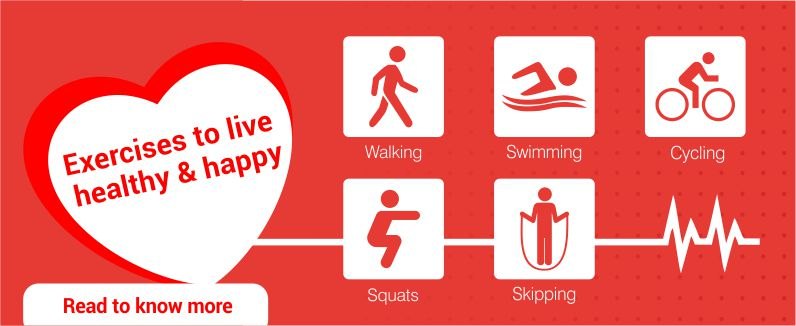